In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def getPCA(matrix):
    # eigen-value / eigen vectors
    eVal, eVec = np.linalg.eigh(matrix)
    return eVal


numTrials = 5000
np.random.seed(0)

res = np.array([])
for this_num in range(numTrials):
    x = np.random.normal(size=(10**3, 10))
    eVal0= getPCA(np.corrcoef(x, rowvar=0))
    res = np.append(res, eVal0)
    

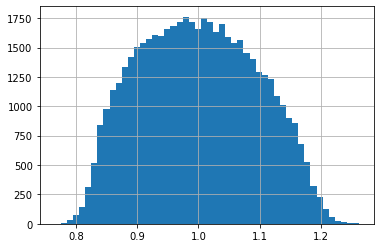

In [2]:
# See the generated eigenvalues
pd.Series(res).hist(bins=50)

In [3]:
def mpPDF(var, q, pts=100, val=None):
    # var: variance of the process
    # q = number of observations / number of factors
    # q = T/N according to Marco's notation
    # pts = number of points to create the pdf
    # output: pdf of the eigen values according to Marcenko-Pastur
    tmp = (1./q)**.5
    
    # eigen value between eMin and eMax are consistent with random behavior
    eMin, eMax = var *(1-tmp)**2, var*(1+tmp)**2
    
    if val is None:
        eVal = np.linspace(eMin, eMax,pts)
    else:
        eVal = np.unique(val)
    
    # this ithe probability density function of the eigen-values of the correlation matrix
    pdf = q/(2*np.pi*var*eVal) * ((eMax - eVal) *(eVal- eMin))**.5
    
    pdf = pd.Series(pdf, index=eVal)
    pdf[(eVal >= eMax) | (eVal <= eMin)] = 0
    
    return pdf

In [4]:
val_hist = np.histogram(res,bins=50, density=True)
val_hist

(array([0.00402801, 0.01611203, 0.06042012, 0.15910631, 0.28397454,
        0.6243412 , 1.04728201, 1.68974924, 1.96365377, 2.28790839,
        2.40874862, 2.68869516, 2.8659275 , 3.03711783, 3.10357996,
        3.16198607, 3.24254622, 3.21636417, 3.33921841, 3.3875545 ,
        3.46610065, 3.54867481, 3.46610065, 3.34324642, 3.51846475,
        3.46005864, 3.2848403 , 3.42380657, 3.19622413, 3.09753794,
        3.15393005, 2.92231961, 2.82564742, 2.608135  , 2.55778491,
        2.48326677, 2.1892222 , 2.0341439 , 1.81260348, 1.72398731,
        1.37556464, 1.06138004, 0.64045323, 0.45315087, 0.25376449,
        0.12084023, 0.04833609, 0.02416805, 0.01007002, 0.00805602]),
 array([0.76569923, 0.77562969, 0.78556016, 0.79549063, 0.8054211 ,
        0.81535156, 0.82528203, 0.8352125 , 0.84514297, 0.85507343,
        0.8650039 , 0.87493437, 0.88486484, 0.8947953 , 0.90472577,
        0.91465624, 0.92458671, 0.93451717, 0.94444764, 0.95437811,
        0.96430858, 0.97423904, 0.98416951, 0.

In [5]:
pdf = mpPDF(1., 100., val = val_hist[1])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


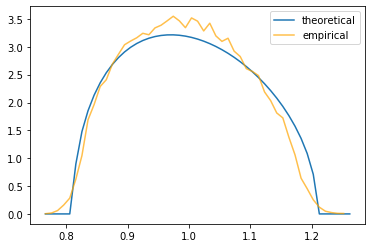

In [6]:
fig, ax = plt.subplots()
pdf.plot(ax=ax, label='theoretical')
ax.plot(val_hist[1][:-1], val_hist[0],alpha=0.7,color='orange', label='empirical')
ax.legend()
#pd.Series(val_hist[0], index=val_hist[1]).plot()